# **ANALISIS REGRESI PADA KASUS PREDIKSI HARGA RUMAH DENGAN MENGGUNAKAN ALGORITMA SUPPORT VECTOR REGRESSOR DAN OPTIMASI HYPERPARAMETER DENGAN METODE GRID SEARCH**

![Image](https://www.vhv.rs/dpng/d/170-1709506_house-1-home-photography-exterior-luxury-hd-png.png)

---

## **Bagian I ---> Importing library and Data Understanding**

In [ ]:
#Library for data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Library for data modeling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Library for data evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Read dataset with pandas dataframe
df = pd.read_csv("C:/Users/User/Documents/Studycase/Penelitian ML/kc_house_data.csv")
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6753,3276180020,20150327T000000,385000.0,4,1.75,1660,10757,1.0,0,0,...,7,1000,660,1980,0,98056,47.5071,-122.194,1880,8319
17130,6170900190,20140819T000000,325000.0,2,1.00,750,5534,1.0,0,0,...,7,750,0,1947,0,98177,47.7017,-122.360,1050,5534
3808,3530540090,20141113T000000,245000.0,2,1.50,1450,6258,1.0,0,0,...,8,1450,0,1983,0,98198,47.3785,-122.322,1460,5375
4263,5152100110,20150422T000000,530000.0,4,2.00,2150,14161,1.0,0,2,...,8,1330,820,1966,0,98003,47.3376,-122.323,2310,14034
2400,3336000791,20150407T000000,325000.0,3,1.00,950,4500,1.0,0,0,...,6,950,0,1943,0,98118,47.5273,-122.265,1140,4500
10061,6979900370,20141114T000000,574000.0,4,2.50,3240,22795,2.0,0,0,...,8,3240,0,1998,0,98053,47.6329,-121.969,2570,29761
8729,6383000690,20150325T000000,587100.0,3,2.25,1670,6414,1.0,0,0,...,8,1670,0,1961,0,98117,47.6921,-122.386,2130,7035
5562,2154550020,20141111T000000,250000.0,3,2.50,1790,6191,2.0,0,0,...,8,1790,0,1992,0,98031,47.4102,-122.195,1790,6758
12574,302000065,20150129T000000,184000.0,3,1.00,970,14850,1.0,0,0,...,7,970,0,1968,0,98001,47.3251,-122.268,1410,14850
14909,9558050780,20150414T000000,380000.0,4,2.50,1940,3200,2.0,0,0,...,8,1940,0,2004,0,98058,47.4583,-122.118,1900,3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Features Understanding**

1. id — ID unik untuk setiap rumah yang dijual
2. date— Tanggal penjualan rumah
3. price — Harga rumah
4. bedrooms — Jumlah kamar tidur
5. bathrooms— Jumlah kamar mandi
6. sqft_living — Luas interior rumah
7. sqft_lot — Luas tanah
8. floors — Jumlah lantai
9. waterfront — Indeks apakah apartemen menghadap ke tepi laut atau tidak
10. view — Indeks tentang pemandangan rumah
11. condition — Indeks kondisi rumah
12. grade — Indeks mengenai tingkat ketahanan konstruksi bangunan
13. sqft_above — Luas rumah di atas permukaan tanah
14. sqft_basement — Luas basement
15. yr_built — Tahun rumah dibangun
16. yr_renovated — Tahun renovasi terakhir
17. zipcode — Kode pos
18. lat — Lintang
19. long — Bujur
20. sqft_living15 — luas interior perumahan dari15 tetangga terdekat
21. sqft_lot15 — Luas tanah dari 15 tetangga terdekat

In [4]:
#Descriptive Statistic of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Missing value detection
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Duplicate Data detection
print(df.duplicated().value_counts())

False    21613
dtype: int64


In [7]:
#select to numeric data
datta = df.drop(["date"], axis=1)

In [8]:
datta = datta.drop(["id"], axis=1)

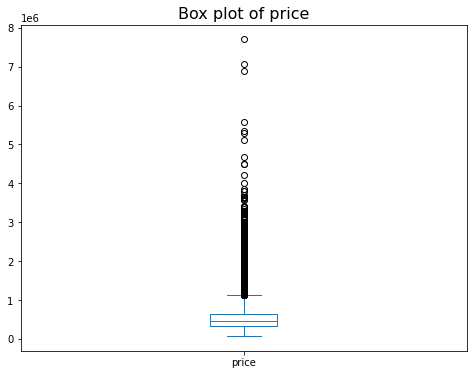

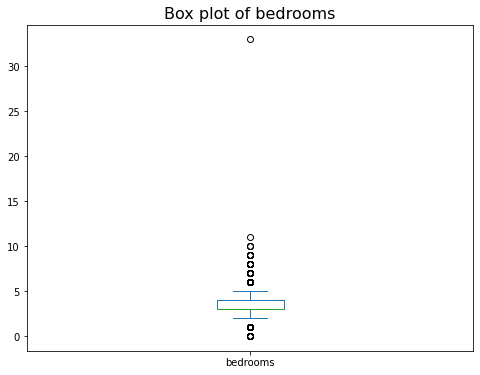

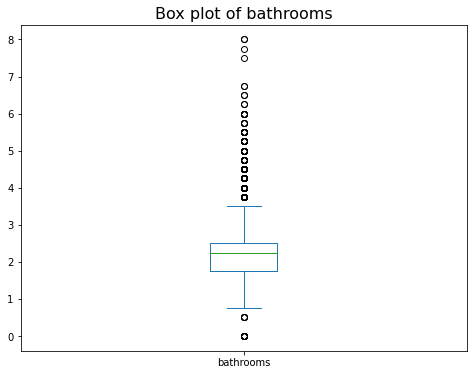

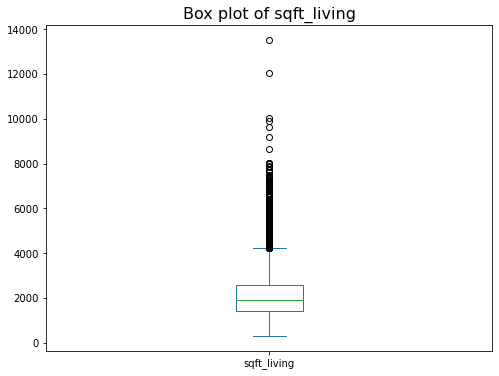

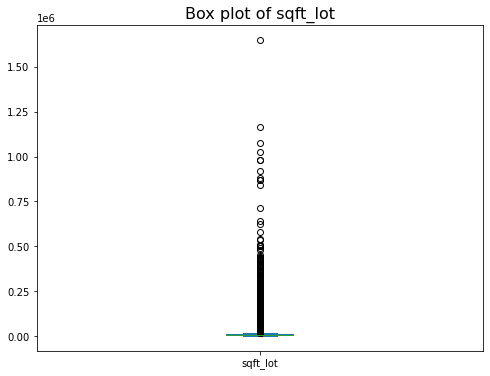

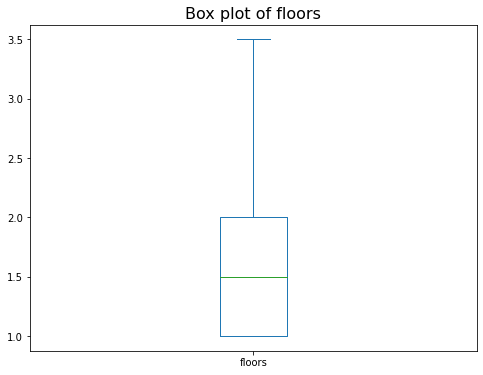

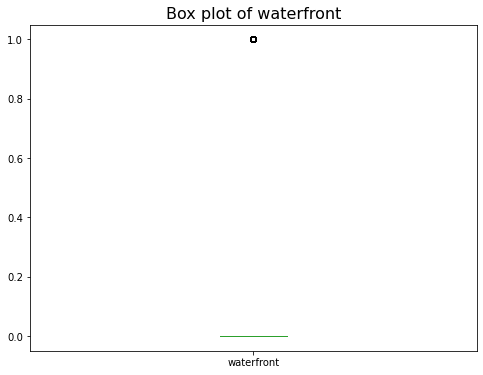

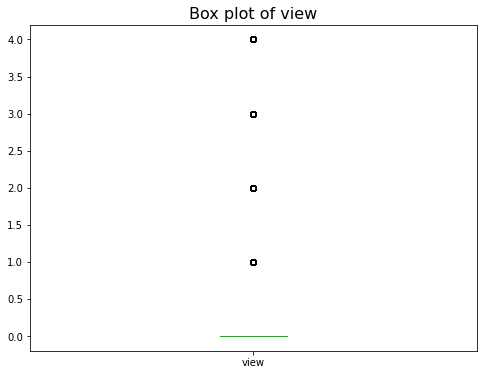

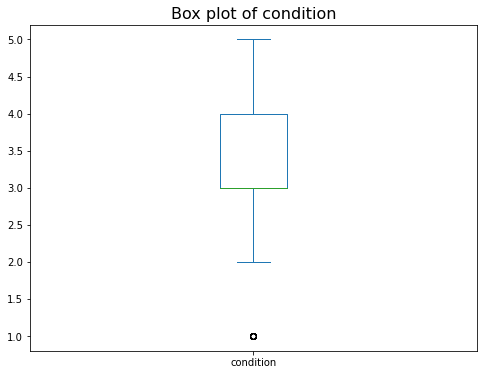

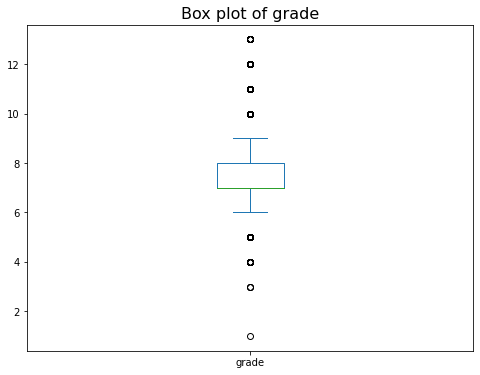

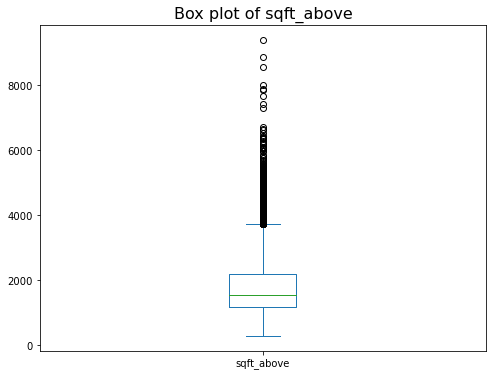

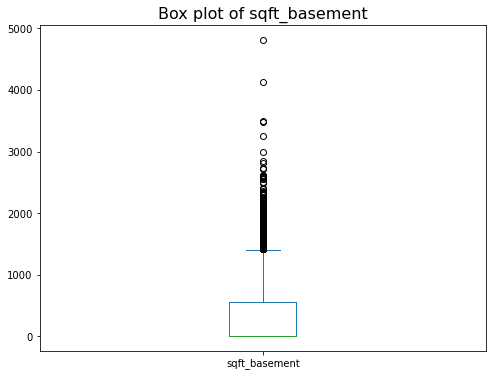

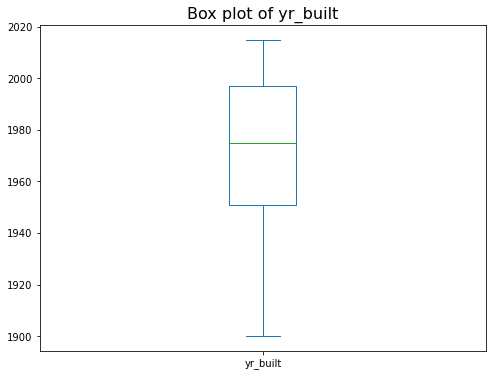

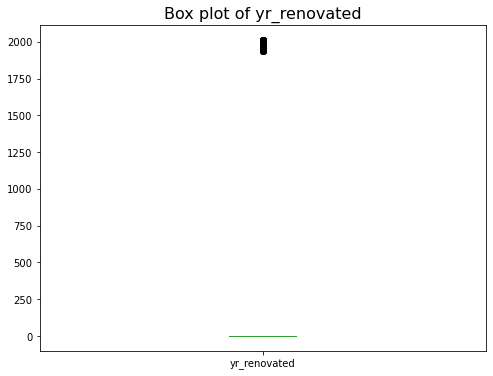

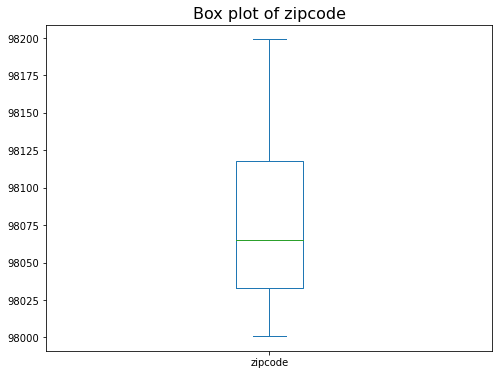

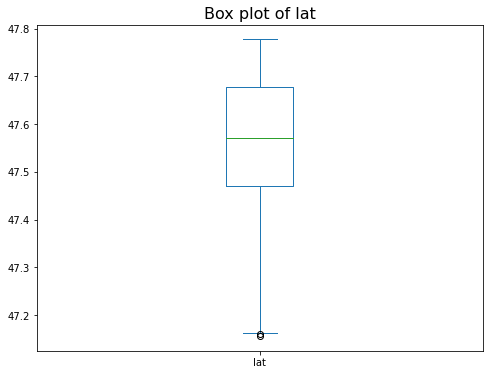

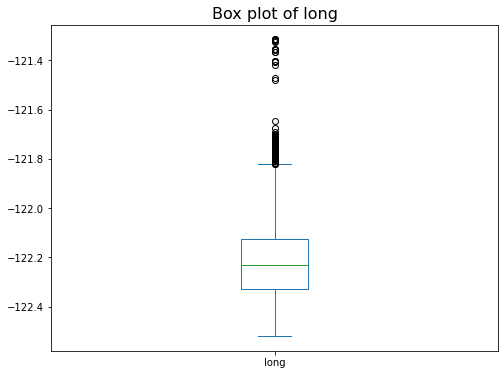

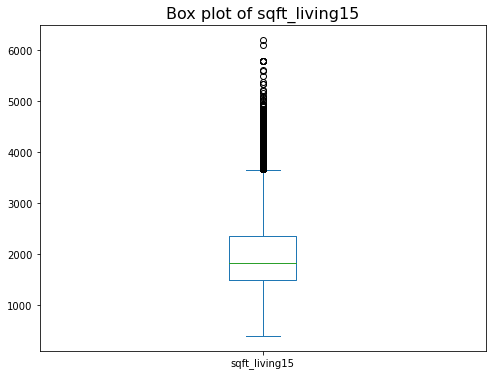

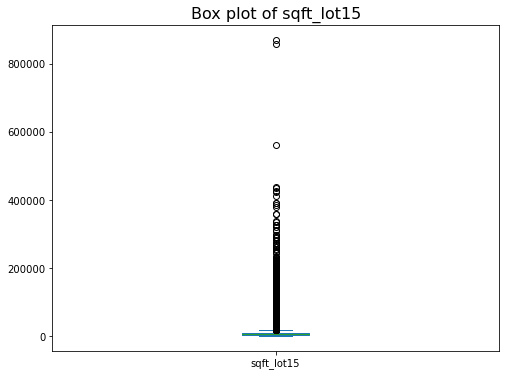

In [9]:
#Outlier detection with Boxplot
list_feature = datta.columns
for i in list_feature:
    datta[i].plot(kind='box', figsize=(8, 6))
    plt.title('Box plot of {}'.format(i), size=16)
    plt.show()

***

## **Bagian II ---> Data Preparation/cleaning**

In [10]:
#Handling Extreem Outlier
from scipy.stats import zscore
for i in list_feature:
    mean = np.mean(datta[i])
    std = np.std(datta[i])
    threshold = 2*std
    for j in datta[i]:
        z_score = (j - mean)/std
        if z_score > threshold:
            j = mean

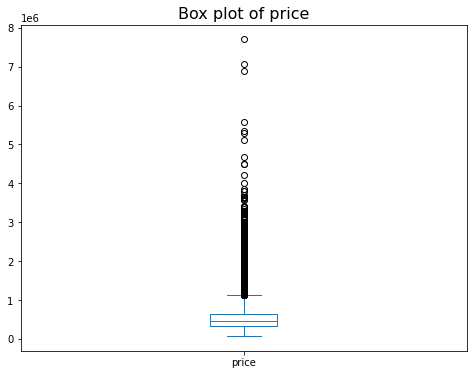

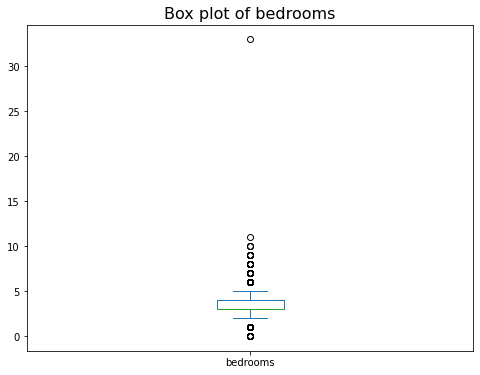

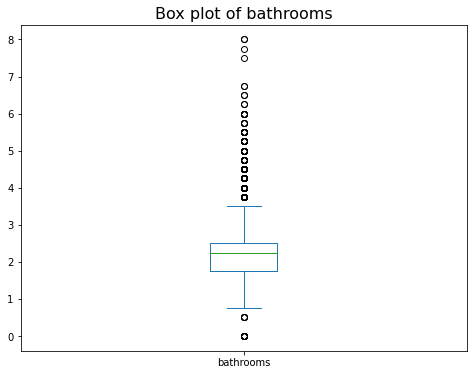

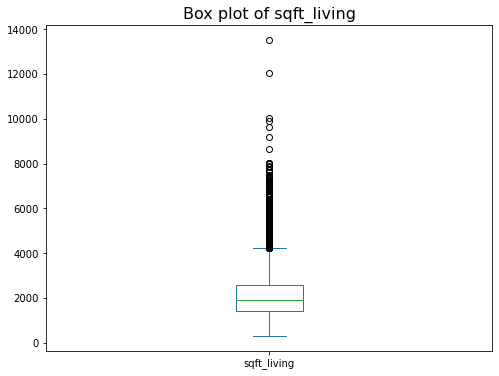

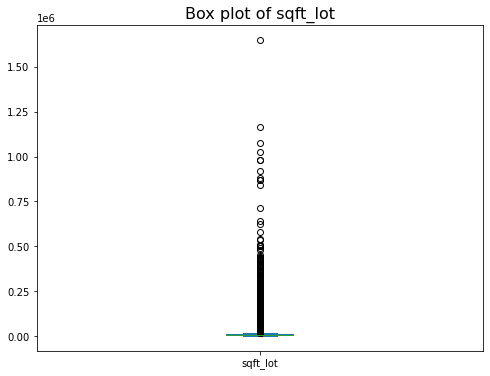

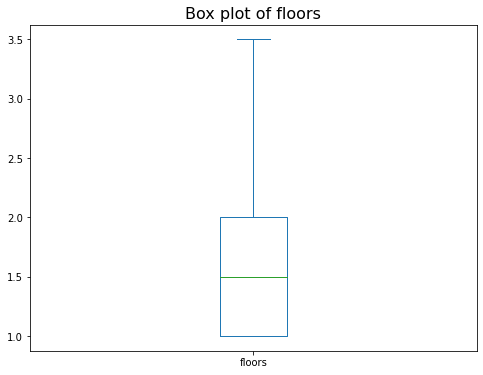

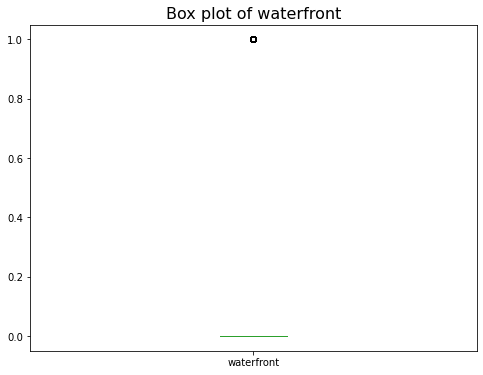

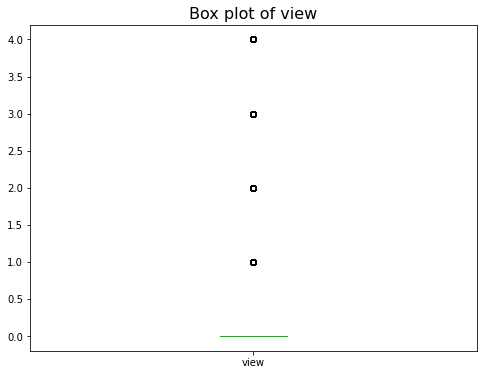

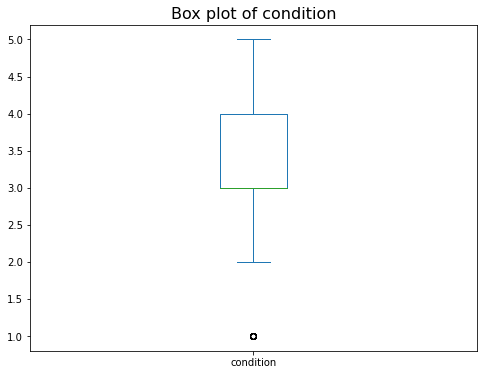

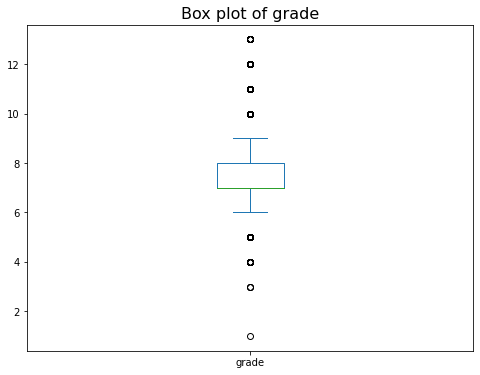

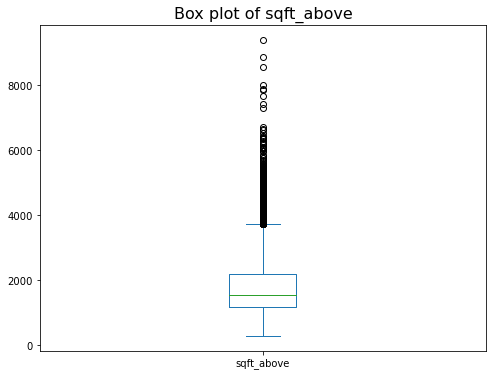

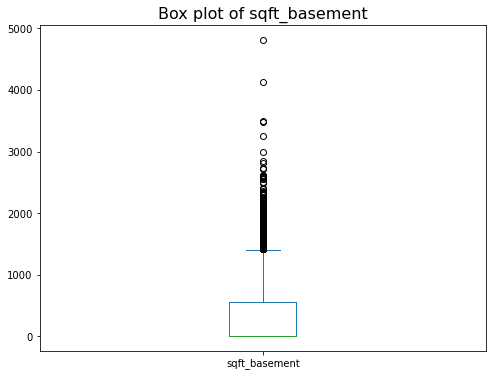

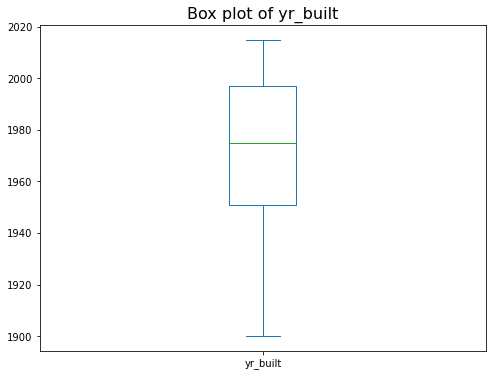

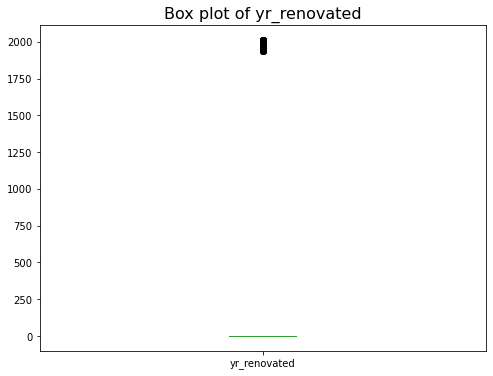

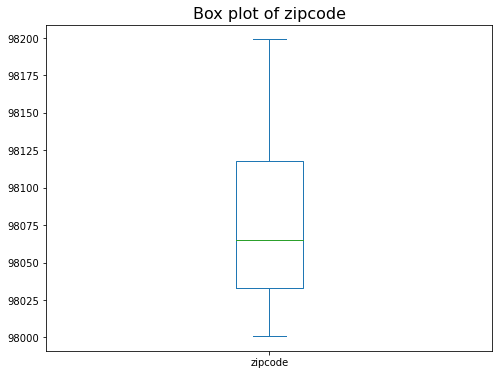

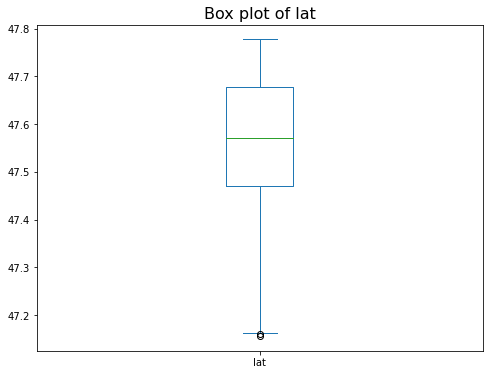

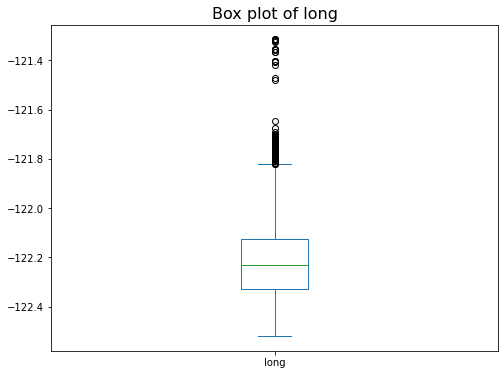

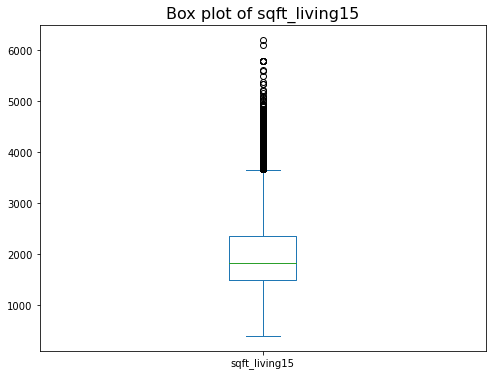

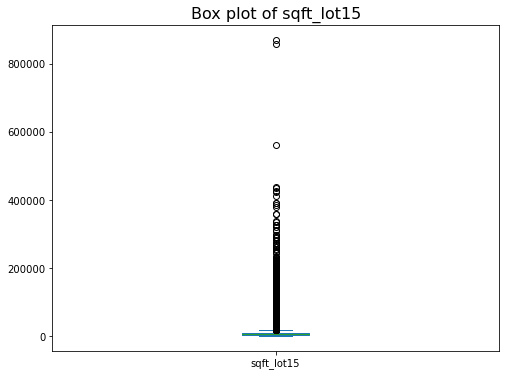

In [11]:
#Visualization with Boxplot after handling outlier
list_feature = datta.columns
for i in list_feature:
    datta[i].plot(kind='box', figsize=(8, 6))
    plt.title('Box plot of {}'.format(i), size=16)
    plt.show()

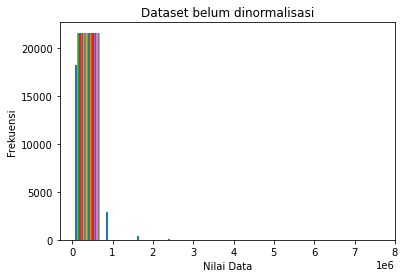

In [12]:
#Visualisasi dataset sebelum dinormalisasi
plt.hist(datta)
plt.title('Dataset belum dinormalisasi')
plt.xlabel('Nilai Data')
plt.ylabel('Frekuensi')
plt.show()

In [13]:
#Calculation of mean and Standard deviasion
mean_ = datta.mean()
Std_dev = datta.std()

In [14]:
#Dataset Normalization with Z_score
Z_norm = (datta - mean_)/Std_dev
datta[Z_norm.columns] = Z_norm

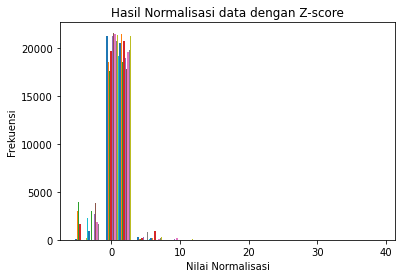

In [15]:
#Visualization after normalization process
plt.hist(Z_norm)
plt.title('Hasil Normalisasi data dengan Z-score')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Frekuensi')
plt.show()

In [16]:
scale = MinMaxScaler(feature_range=(-1, 1))
minmax_norm = scale.fit_transform(datta)

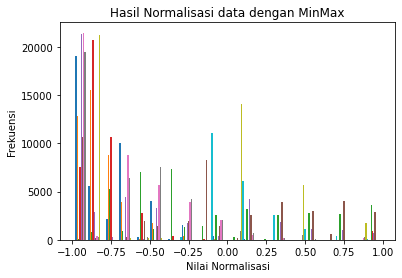

In [17]:
plt.hist(minmax_norm)
plt.title('Hasil Normalisasi data dengan MinMax')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Frekuensi')
plt.show()

In [18]:
sc = RobustScaler()
Robust_norm = sc.fit_transform(datta)

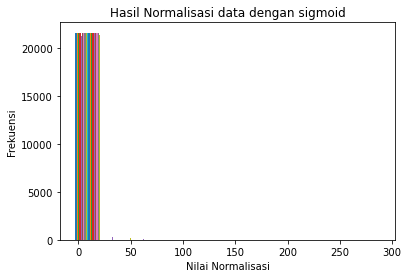

In [19]:
plt.hist(Robust_norm)
plt.title('Hasil Normalisasi data dengan sigmoid')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Frekuensi')
plt.show()

In [20]:
data_norm = minmax_norm

In [21]:
data_norm = pd.DataFrame(data_norm)

In [22]:
data_norm.columns

RangeIndex(start=0, stop=19, step=1)

In [23]:
indexx = data_norm.columns
data_norm = data_norm.rename(columns={col: list_feature[i] for i, col in enumerate(data_norm.columns)})

In [24]:
data_norm

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.961469,-0.818182,-0.7500,-0.865660,-0.993785,-1.0,-1.0,-1.0,0.0,-1.387779e-16,-0.804825,-1.000000,-0.043478,-1.000000,0.787879,0.142995,-0.564784,-0.676131,-0.988515
1,-0.878557,-0.818182,-0.4375,-0.655849,-0.991856,-0.2,-1.0,-1.0,0.0,-1.387779e-16,-0.587719,-0.834025,-0.113043,0.976179,0.252525,0.817919,-0.667774,-0.555670,-0.983946
2,-0.972459,-0.878788,-0.7500,-0.927547,-0.988515,-1.0,-1.0,-1.0,0.0,-1.666667e-01,-0.894737,-1.000000,-0.426087,-1.000000,-0.727273,0.872286,-0.524917,-0.201170,-0.982974
3,-0.861246,-0.757576,-0.2500,-0.747925,-0.994572,-1.0,-1.0,-1.0,1.0,-1.387779e-16,-0.833333,-0.622407,0.130435,-1.000000,0.363636,0.173878,-0.790698,-0.669248,-0.990009
4,-0.885902,-0.818182,-0.5000,-0.790189,-0.990841,-1.0,-1.0,-1.0,0.0,1.666667e-01,-0.695175,-1.000000,0.513043,-1.000000,-0.262626,0.482709,-0.212625,-0.517811,-0.984258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.925246,-0.818182,-0.3750,-0.812830,-0.999260,0.6,-1.0,-1.0,0.0,1.666667e-01,-0.728070,-1.000000,0.895652,-1.000000,0.030303,0.748110,-0.712625,-0.610738,-0.998029
21609,-0.914754,-0.757576,-0.3750,-0.695094,-0.993588,-0.2,-1.0,-1.0,0.0,1.666667e-01,-0.557018,-1.000000,0.982609,-1.000000,0.464646,0.141387,-0.739203,-0.507486,-0.984954
21610,-0.914203,-0.878788,-0.8125,-0.889811,-0.998994,-0.2,-1.0,-1.0,0.0,-1.387779e-16,-0.839912,-1.000000,0.895652,-1.000000,0.444444,0.410648,-0.634551,-0.786267,-0.996885
21611,-0.914754,-0.818182,-0.3750,-0.802264,-0.997737,-0.2,-1.0,-1.0,0.0,1.666667e-01,-0.712719,-1.000000,0.808696,-1.000000,-0.737374,0.217951,-0.252492,-0.652039,-0.998539


___

## **Bagian III ---> Exploratory Data Analysis (EDA)**

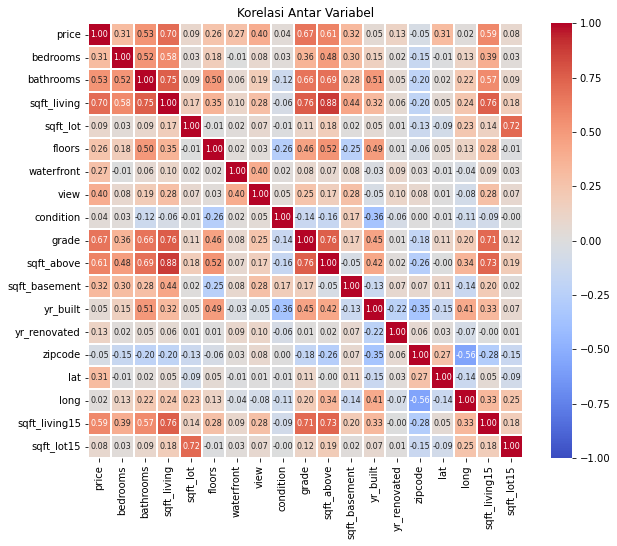

In [25]:
#Corelation Analysis
corr = data_norm.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [27]:
data_norm.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

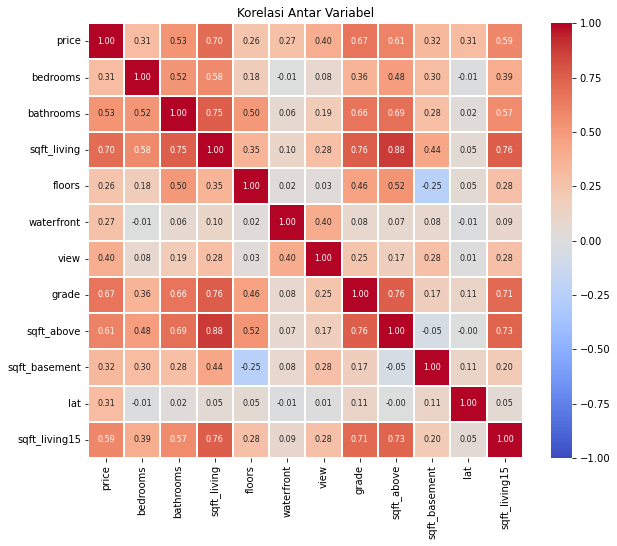

In [28]:
#Corelation Analysis after feature selection
corr = data_norm.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

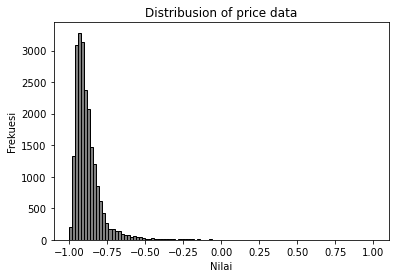

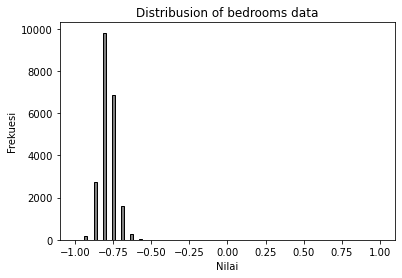

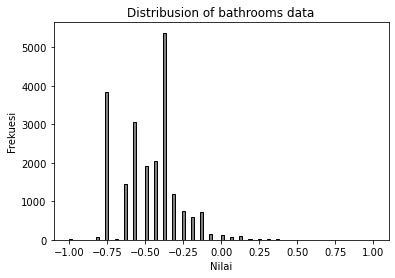

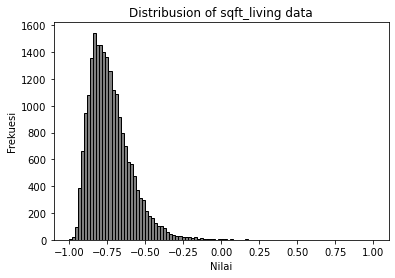

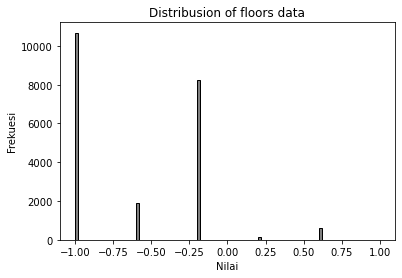

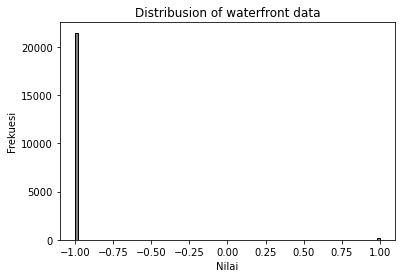

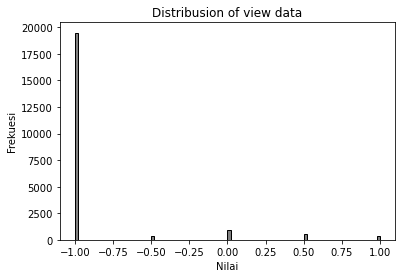

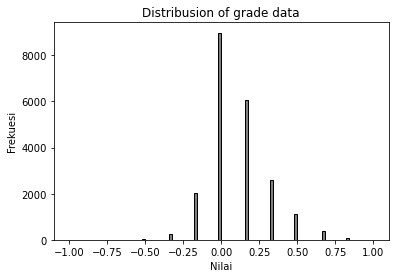

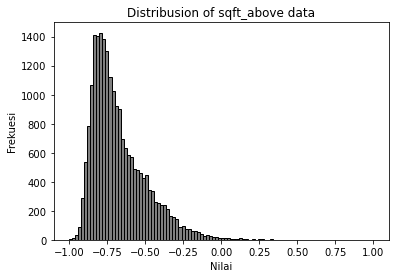

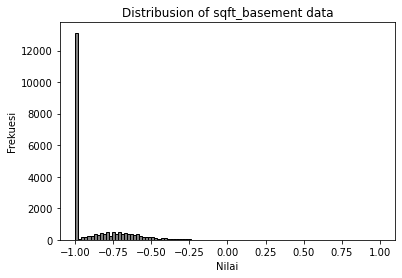

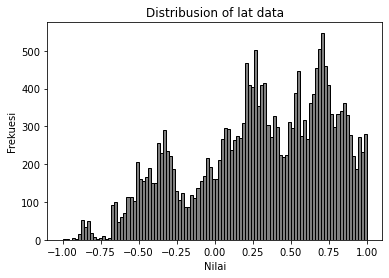

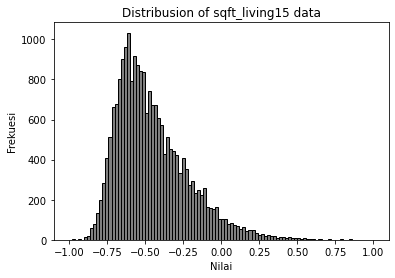

In [29]:
for i in data_norm.columns:
    plt.hist(data_norm[i], bins=100, color='gray', edgecolor='black')
    plt.title("Distribusion of {} data".format(i))
    plt.xlabel("Nilai")
    plt.ylabel("Frekuesi")
    plt.show()

---

## **Bagian IV ---> Data Modeling with SVR and RFR**

In [30]:
#identify features data and target data
X = data_norm.drop('price', axis=1)
Y = data_norm['price']

In [31]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

BUILDING MODEL WITH SUPPORT VECTOR REGRESSION GRIDSEARCH OPTIMIZE HYPERPARAMETER

In [32]:
#SVR algorithm
svr = SVR()

In [33]:
#Parameter GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale', 'auto']
}

In [34]:
#Searching best hyperparameter with gridsearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001],
                         'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error')

In [39]:
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(best_params)
print(best_score)

{'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
0.0018614893617783577


In [36]:
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.01)

In [40]:
y_pred = best_svr.predict(X_test)
y_pred

array([-0.92117843, -0.82885136, -0.74047141, ..., -0.93069065,
       -0.86150477, -0.92814267])

C:\Users\User\AppData\Local\Temp\ipykernel_20488\895347335.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='r')


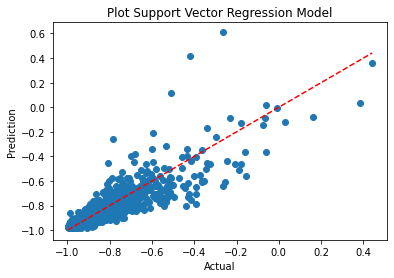

In [64]:
#Visualization predictive model using scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='r')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Plot Support Vector Regression Model')
plt.show()

BUILDING MODEL WITH RANDOM FORREST REGRESSION GRIDSEARCH OPTIMIZE HYPERPARAMETER

In [50]:
#RFR Algorithm
rfr = RandomForestRegressor()

In [51]:
#Parameter Gridsearch
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
#Searching best hyperparameter with gridsearchCV
grid_searchh = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_searchh.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [56]:
best_paramss = grid_searchh.best_params_
best_scores = -grid_searchh.best_score_
print(best_paramss)
print(best_scores)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.0016422003558440343


In [57]:
best_rfr = RandomForestRegressor(**best_paramss)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [60]:
y_predd = best_rfr.predict(X_test)
y_predd

array([-0.91478639, -0.80759324, -0.73656191, ..., -0.9386871 ,
       -0.8351965 , -0.92940354])

C:\Users\User\AppData\Local\Temp\ipykernel_20488\2887791842.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='g')


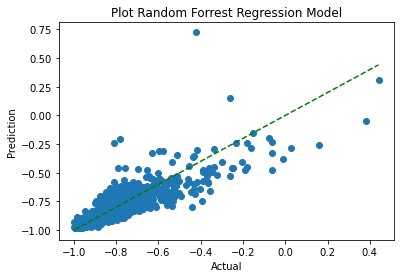

In [63]:
#Visualization predictive model using scatter plot
plt.scatter(y_test, y_predd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Plot Random Forrest Regression Model')
plt.show()

----

## **Bagian V ---> Model Evaluation**

METRICS R2 (R-SQUARED)

In [65]:
R2_SVR = r2_score(y_test, y_pred)
R2_RFR = r2_score(y_test, y_predd)

METRICS MSE (MEAN SQUARED ERROR)

In [66]:
MSE_SVR = mean_squared_error(y_test, y_pred)
MSE_RFR = mean_squared_error(y_test, y_predd)

METRICS RMSE (ROOT MEAN SQUARED ERROR)

In [67]:
RMSE_SVR = np.sqrt(MSE_SVR)
RMSE_RFR = np.sqrt(MSE_RFR)

METRICS MAE (MEAN ABSOLUTE ERROR)

In [68]:
MAE_SVR = mean_absolute_error(y_test, y_pred)
MAE_RFR = mean_absolute_error(y_test, y_predd)

**SUMMARY RESULT PERFORMANCE OF THE MODELS**

In [69]:
data_evaluation = {'Model': ['SVR', 'RFR'],
                   'R2': [R2_SVR, R2_RFR],
                   'MSE': [MSE_SVR, MSE_RFR],
                   'RMSE': [RMSE_SVR, RMSE_RFR],
                   'MAE': [MAE_SVR, MAE_RFR]}
evaluation_result = pd.DataFrame(data_evaluation)
evaluation_result

,Model,R2,MSE,RMSE,MAE
0,SVR,0.766285,0.002431,0.049303,0.025222
1,RFR,0.783844,0.002248,0.047415,0.023934


---